In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-bright")
%matplotlib inline

# Данные

Описание колонок датасета:

*   **customer_id** — Клиентский идентификатор.
*   **credit_score** — Кредитный рейтинг.
*   **country** — Страна.
*   **gender** — Пол.
*   **age** — Возраст.
*   **tenure** — Стаж.
*   **balance** — Баланс.
*   **products_number** — Количество продуктов.
*   **credit_card** — Кредитная карта.
*   **active_member** — Активный член.
*   **estimated_salary** — Предполагаемая зарплата.
*   **churn** — Отток, используется как целевая переменная. 1, если клиент покинул банк за определенный период, или 0, если нет.



# 1. Предобработка данных

In [ ]:
# Загрузим данные
df = pd.read_csv('data/Bank_Customer_Churn_Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# общая информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB



В датасете содержатся следующие типы данных:

* customer_id: Столбец содержит числовые идентификаторы клиентов банка.
* credit_score: Здесь представлены числовые значения кредитного рейтинга клиентов.
* country: Столбец указывает на страну клиента и содержит категориальные данные (названия стран).
* gender: Столбец содержит информацию о поле клиента, категориальные данные: "Female" и "Male".
* age: Возраст клиентов, представлен числовыми значениями.
* tenure: Столбец содержит числовые значения, представляющие стаж клиентов в банке.
* balance: Баланс клиентов на их счетах, представлен числовыми значениями.
* products_number: Число продуктов, используемых клиентами, представлено числовыми данными.
* credit_card: Данный столбец, является бинарным, указывая, имеет ли клиент кредитную карту. Принимает значения 0 (нет) и 1 (да).
* active_member: Бинарный столбец, указывающий, является ли клиент активным членом банка. Также принимает значения 0 (неактивный) и 1       (активный).
* estimated_salary: Предполагаемая зарплата клиентов, представлен числовыми значениями.
* churn: Целевая переменная, указывающая на отток клиента. Она также бинарна, принимая значения 0 (не произошел отток) и 1 (произошел отток).

В этом датасете присутствуют числовые, категориальные и бинарные типы данных.

In [ ]:
df.isnull().sum() # Пропусков нет

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
# Выделим колонки с категориальными признаками
categorical_columns = df.select_dtypes(include=['object']).columns

# Посмотрим на зачения категориальных переменных, чтобы убедиться что
# нет пропусков (пустых строк, незначимых строк)
for i in categorical_columns:
  print(i)
  print(df[i].value_counts(), end='\n\n')

country
country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

gender
gender
Male      5457
Female    4543
Name: count, dtype: int64



In [ ]:
# Удалим колонку уникальных индификаторов customer_id
print("Количество повротов в колонке customer_id: ", len(df) - df.customer_id.nunique())
df.drop(columns='customer_id', inplace=True)

Количество повротов в колонке customer_id:  0


# EDA

Разделим датасет на тестовую и тренировочную выборки, чтобы проводить EDA только по тренировочной

In [ ]:
# Делим датасет на тренировочную и тестовую выборки
df_train, df_test = train_test_split(df, test_size=0.25, stratify=df['churn'], random_state =42)

len(df_train), len(df_test)

(7500, 2500)

Выведем основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение.

In [ ]:
df_train.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,7500.000000,7500.00000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,650.507733,38.98000,5.022800,76328.197195,1.532267,0.707200,0.516667,99540.472065,0.203733
std,96.637724,10.55188,2.893613,62385.961630,0.581897,0.455078,0.499755,57295.127395,0.402800
min,350.000000,18.00000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.00000,3.000000,0.000000,1.000000,0.000000,0.000000,50417.950000,0.000000
50%,652.000000,37.00000,5.000000,96943.320000,1.000000,1.000000,1.000000,98940.675000,0.000000
75%,717.000000,44.00000,8.000000,127785.447500,2.000000,1.000000,1.000000,148428.572500,0.000000
max,850.000000,92.00000,10.000000,222267.630000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
features = df_train.columns.drop('churn')
subsets = ['credit_score']
df_train.groupby('churn')[features].mean(numeric_only=True)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,
0,652.159578,37.523778,5.016075,72586.958505,1.546383,0.710147,0.555090,98868.429612
1,644.051702,44.671466,5.049084,90950.368305,1.477094,0.695681,0.366492,102167.067310


**Balance**

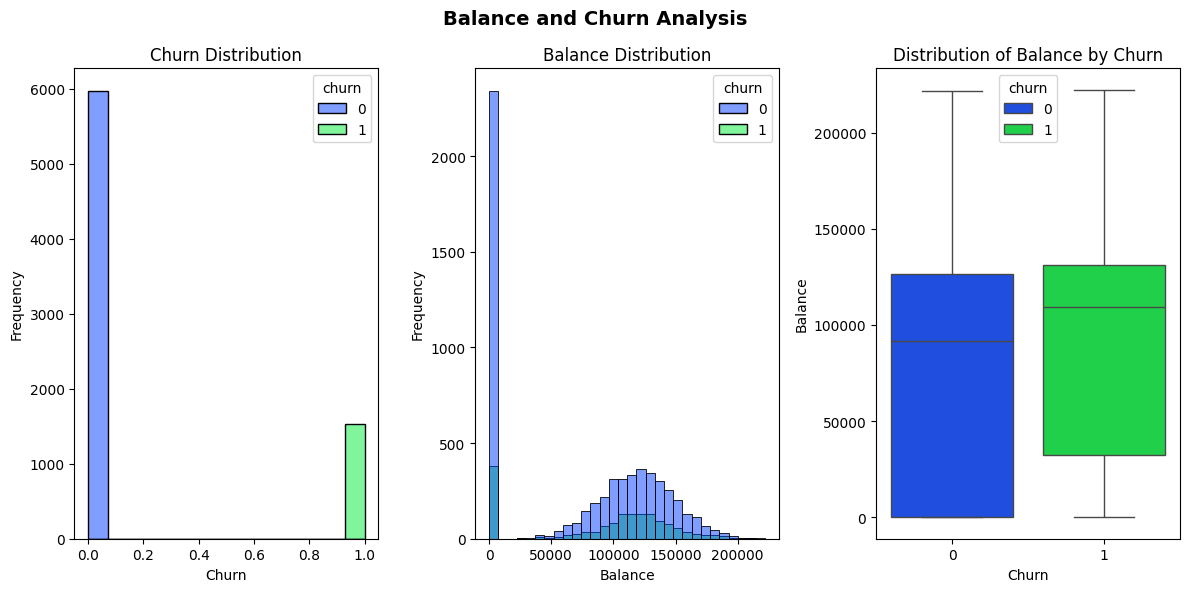

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Гистограмма для распределения классов
sns.histplot(data=df_train, x="churn", hue="churn", ax=axs[0])
axs[0].set_xlabel("Churn")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Churn Distribution");

# Гистограмм для распределения баланса клиентов
sns.histplot(data=df_train, x="balance", ax=axs[1], hue="churn", bins=30)
axs[1].set_xlabel("Balance")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Balance Distribution")

# График ящика с усами (boxenplot)
sns.boxplot(x="churn", y="balance", data=df_train, hue="churn", ax=axs[2])
axs[2].set_xlabel("Churn")
axs[2].set_ylabel("Balance")
axs[2].set_title("Distribution of Balance by Churn")

# Добавление общего заголовка для всего изображения
plt.suptitle("Balance and Churn Analysis", fontsize=14, weight='bold')
plt.tight_layout();

Обратим внимание, что целевая переменная несбалансирована по классам: количество экземпляров класса с меткой 1 в четыре раза меньше,
чем с меткой 0. Однако посмотрев на гистограмму распределения баланса на счету, можнро сказать, что распределение у классов одинаковое. Кроме того, ширина боксплота для распределения класса 0 значительно превышает ширину боксплота для класса 1, что указывает на большую вариативность значений в этом классе.

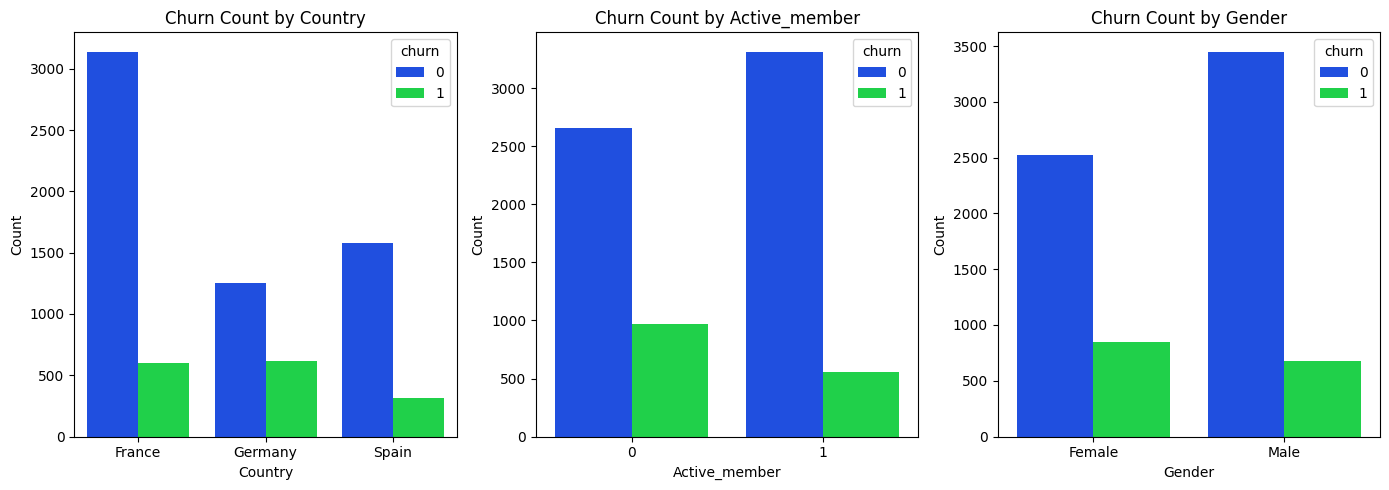

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

# График количества оттоков по странам
sns.countplot(data=df_train, x='country', hue='churn', ax=axs[0])
axs[0].set_xlabel("Country")
axs[0].set_ylabel("Count")
axs[0].set_title("Churn Count by Country")

# График количества оттоков по активным пользователям
sns.countplot(data=df_train, x='active_member', hue='churn', ax=axs[1])
axs[1].set_xlabel("Active_member")
axs[1].set_ylabel("Count")
axs[1].set_title("Churn Count by Active_member");

# График количества оттоков по активным пользователям
sns.countplot(data=df_train, x='gender', hue='churn', ax=axs[2])
axs[2].set_xlabel("Gender")
axs[2].set_ylabel("Count")
axs[2].set_title("Churn Count by Gender");

plt.tight_layout();

Как можем видеть, по 2 графику, видно, что отток среди неактивных клиентов выше, чем среди активных. Кроме того, из первого графика видно, что относительный отток наибольший в Германии. Из 1 график можно сказать что среди женщин относительный отток больше.

**Credit Score**

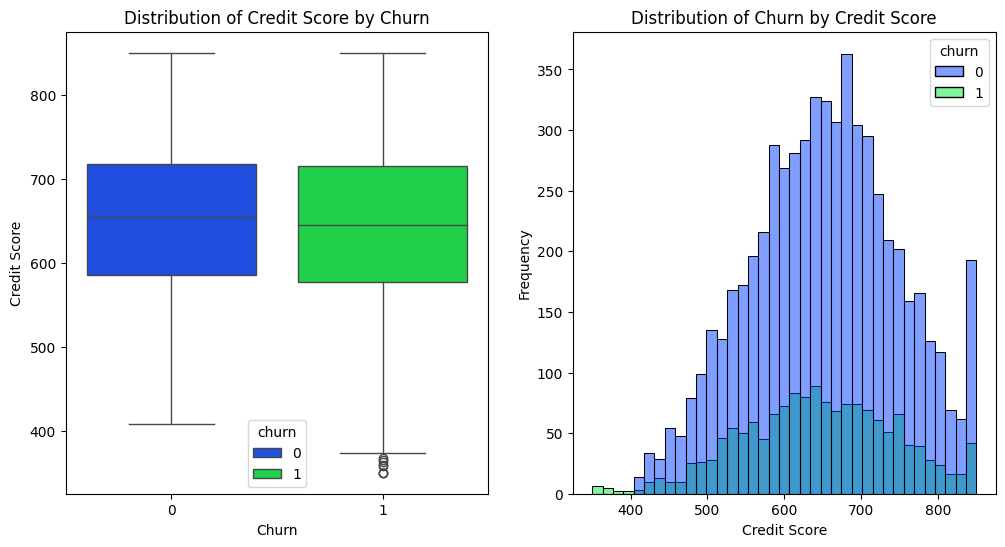

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# График ящика с усами распределения кредитного рейтинга
sns.boxplot(x="churn", y="credit_score", data=df_train, hue="churn", ax=axs[0])
axs[0].set_xlabel("Churn")
axs[0].set_ylabel("Credit Score")
axs[0].set_title("Distribution of Credit Score by Churn")

# Гистограмма кредитного рейтинга
sns.histplot(data=df_train, x="credit_score", hue="churn", ax=axs[1])
axs[1].set_xlabel("Credit Score")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of Churn by Credit Score")
plt.tight_layout();

Из графиков видно, что распределение кредитного рейтинга практически одинаково у обоих классов, что говорит о том, что этот признак, вероятно, не является особенно значимым для прогнозирования оттока клиентов.

**Age**

Text(0.5, 1.0, 'Distribution of Churn by Age')

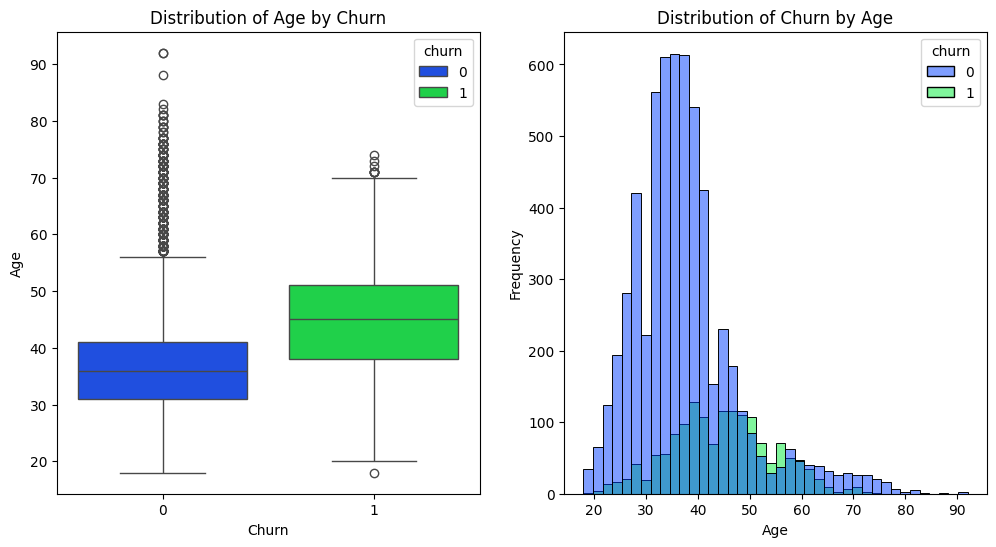

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# График ящика с усами распределения возраста
sns.boxplot(x="churn", y="age", data=df_train, hue="churn", ax=axs[0])
axs[0].set_xlabel("Churn")
axs[0].set_ylabel("Age")
axs[0].set_title("Distribution of Age by Churn")

# Гистограмма возраста
sns.histplot(data=df_train, x="age", hue="churn", bins=40, ax=axs[1])
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of Churn by Age")
plt.tight_layout();

Как видно из графиков, распределение возраста людей, покинувших банк, смещено в сторону более высоких возрастных категорий. Это может означать, что с возрастом вероятность оттока увеличивается.

**Products_number** and **Tenure**

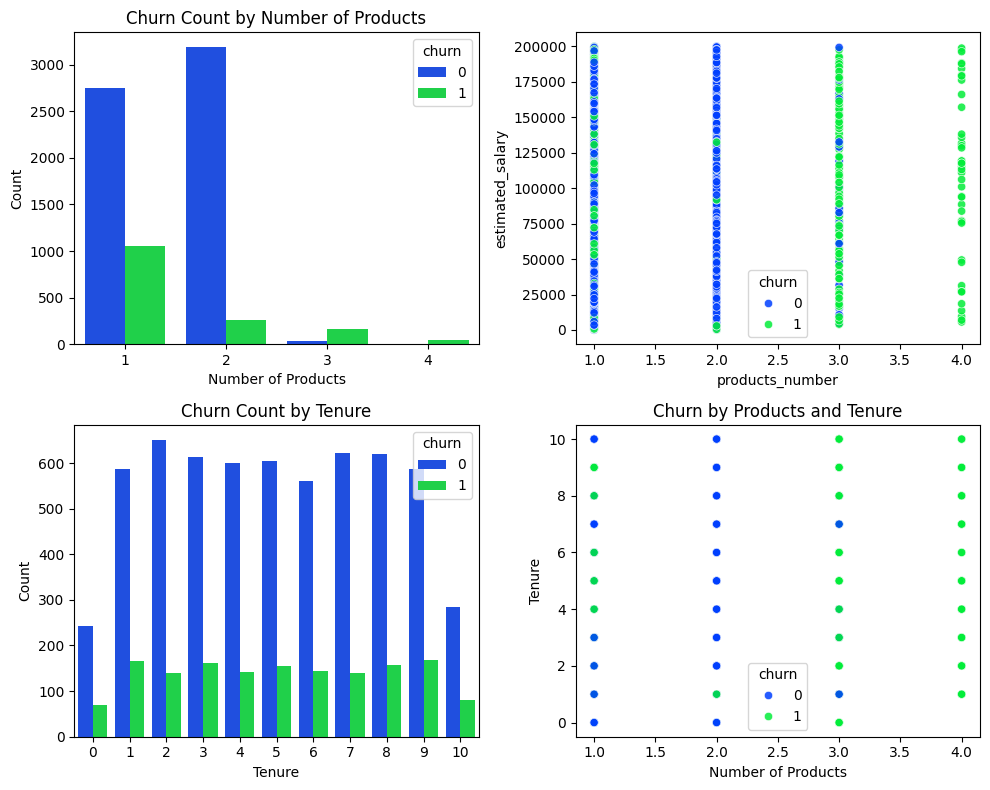

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# График количества оттоков по числу продуктов
sns.countplot(data=df_train, x='products_number', hue='churn', ax=axs[0,0])
axs[0,0].set_xlabel("Number of Products")
axs[0,0].set_ylabel("Count")
axs[0,0].set_title("Churn Count by Number of Products")

# Точечная диаграмма зарплаты от числа продуктов
sns.scatterplot(data=df_train, x="products_number", y="estimated_salary", hue="churn", alpha=0.85, ax=axs[0,1])
axs[0,0].set_xlabel("Number of Products")
axs[0,0].set_ylabel("Count")
axs[0,0].set_title("Churn Count by Number of Products")

# График количества оттоков по стажу
sns.countplot(data=df_train, x='tenure', hue='churn', ax=axs[1,0])
axs[1,0].set_xlabel("Tenure")
axs[1,0].set_ylabel("Count")
axs[1,0].set_title("Churn Count by Tenure")

# Точечная диаграмма стажа от числа продуктов
sns.scatterplot(data=df_train, x="products_number", y="tenure", hue="churn", alpha=0.85, ax=axs[1,1])
axs[1,1].set_xlabel("Number of Products")
axs[1,1].set_ylabel("Tenure")
axs[1,1].set_title("Churn by Products and Tenure")
plt.tight_layout();

Из этих графиков можно сделать вывод, что связь между оттоком и стажем работы в банке не так очевидна, как связь между оттоком и количеством купленных продуктов. Например, клиенты, купившие более двух продуктов, чаще всего покидают банк, в то время как те, кто купил два продукта чаще всего остаются в банке.

**Correlation**

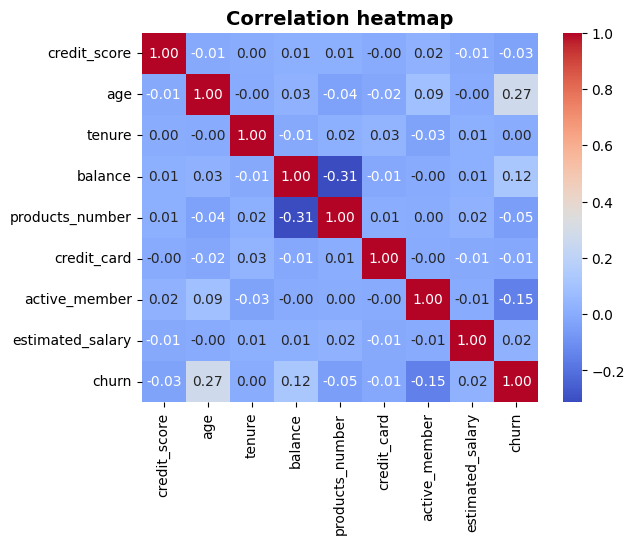

In [ ]:
ax = sns.heatmap(df_train.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt="0.2f")
ax.set_title("Correlation heatmap", fontsize=14, weight='bold')
plt.show()

Из корреляционного анализа, видим что корреляции между признаками нет. Есть только слабые корреляции не привышающие по модулю 0.31.

**Pairplot**

In [ ]:
# # Парные графики для сравнения нескольких переменных
# sns.pairplot(df.drop(columns=['country',	'gender']), hue='churn', diag_kind='kde', plot_kws={'s': 10})
# plt.show()

# Feature Engineering

Изучив проблему оттока клиентов в интернете, мы пришли к выводу, что такие новые фичи могут нам понадобиться:

* balance_salary_ratio (Отношение баланса к предполагаемой зарплате):
  представление о финансовой стабильности клиента. Клиенты с более высоким отношением баланса к предполагаемой зарплате могут иметь меньшую вероятность оттока, так как они могут себе позволить больше финансовых возможностей и, возможно, более лояльны к банку.

* average_balance (Средний баланс):
  представление о финансовой активности клиента в течение периода времени. Более высокий средний баланс может указывать на более высокий уровень лояльности клиента и, следовательно, на меньшую вероятность оттока.

* products_to_age_ratio (Отношение числа продуктов к возрасту):
  уровень удовлетворенности клиента услугами банка. Более высокое отношение числа продуктов к возрасту может свидетельствовать о более глубокой связи клиента с банком, что может уменьшить вероятность его оттока.

* tenure_to_age_ratio (Отношение стажа к возрасту):
  лояльность клиента. Более длительный стаж клиента может быть связан с более глубокой связью с банком и, как следствие, с меньшей вероятностью оттока.

* credit_card_usage_ratio (Использование кредитной карты в процентах от общего баланса):
  финансовое поведение клиента. Более высокий процент использования кредитной карты от общего баланса может свидетельствовать о большем уровне удовлетворенности услугами банка или о зависимости клиента от кредитной карты, что может снизить вероятность его оттока.

In [ ]:
for data in [df_train, df_test]:
  data['balance_salary_ratio'] = data['balance'] / data['estimated_salary']
  data['average_balance'] = data['balance'] / data['tenure']
  data['products_to_age_ratio'] = data['products_number'] / data['age']
  data['tenure_to_age_ratio'] = data['tenure'] / data['age']
  data['credit_card_usage_ratio'] = data['credit_card'] / data['balance']
  data.fillna(0, inplace = True) # исправляем новые пропуски